In [2]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [21]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sma

In [4]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [6]:
dataset=pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')
dataset.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
# EDA and Visualization

In [8]:
data1=dataset[['Price','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Age_08_04']]
data1

,Price,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Age_08_04
0,13500,46986,90,2000,3,5,210,1165,23
1,13750,72937,90,2000,3,5,210,1165,23
2,13950,41711,90,2000,3,5,210,1165,24
3,14950,48000,90,2000,3,5,210,1165,26
4,13750,38500,90,2000,3,5,210,1170,30
...,...,...,...,...,...,...,...,...,...
1431,7500,20544,86,1300,3,5,69,1025,69
1432,10845,19000,86,1300,3,5,69,1015,72
1433,8500,17016,86,1300,3,5,69,1015,71
1434,7250,16916,86,1300,3,5,69,1015,70


In [9]:
#checking for null values
data1.isna().sum()

Price            0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
Age_08_04        0
dtype: int64

In [11]:
data1.shape

(1436, 9)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Age_08_04      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [13]:
# doors and gears have same values we drop it
data2=data1.drop(['Doors','Gears'],axis=1)
data2.head()

,Price,KM,HP,cc,Quarterly_Tax,Weight,Age_08_04
0,13500,46986,90,2000,210,1165,23
1,13750,72937,90,2000,210,1165,23
2,13950,41711,90,2000,210,1165,24
3,14950,48000,90,2000,210,1165,26
4,13750,38500,90,2000,210,1170,30


In [14]:
#checking correlation with new dataset
data2.corr()

,Price,KM,HP,cc,Quarterly_Tax,Weight,Age_08_04
Price,1.000000,-0.569960,0.314990,0.126389,0.219197,0.581198,-0.876590
KM,-0.569960,1.000000,-0.333538,0.102683,0.278165,-0.028598,0.505672
HP,0.314990,-0.333538,1.000000,0.035856,-0.298432,0.089614,-0.156622
cc,0.126389,0.102683,0.035856,1.000000,0.306996,0.335637,-0.098084
Quarterly_Tax,0.219197,0.278165,-0.298432,0.306996,1.000000,0.626134,-0.198431
Weight,0.581198,-0.028598,0.089614,0.335637,0.626134,1.000000,-0.470253
Age_08_04,-0.876590,0.505672,-0.156622,-0.098084,-0.198431,-0.470253,1.000000


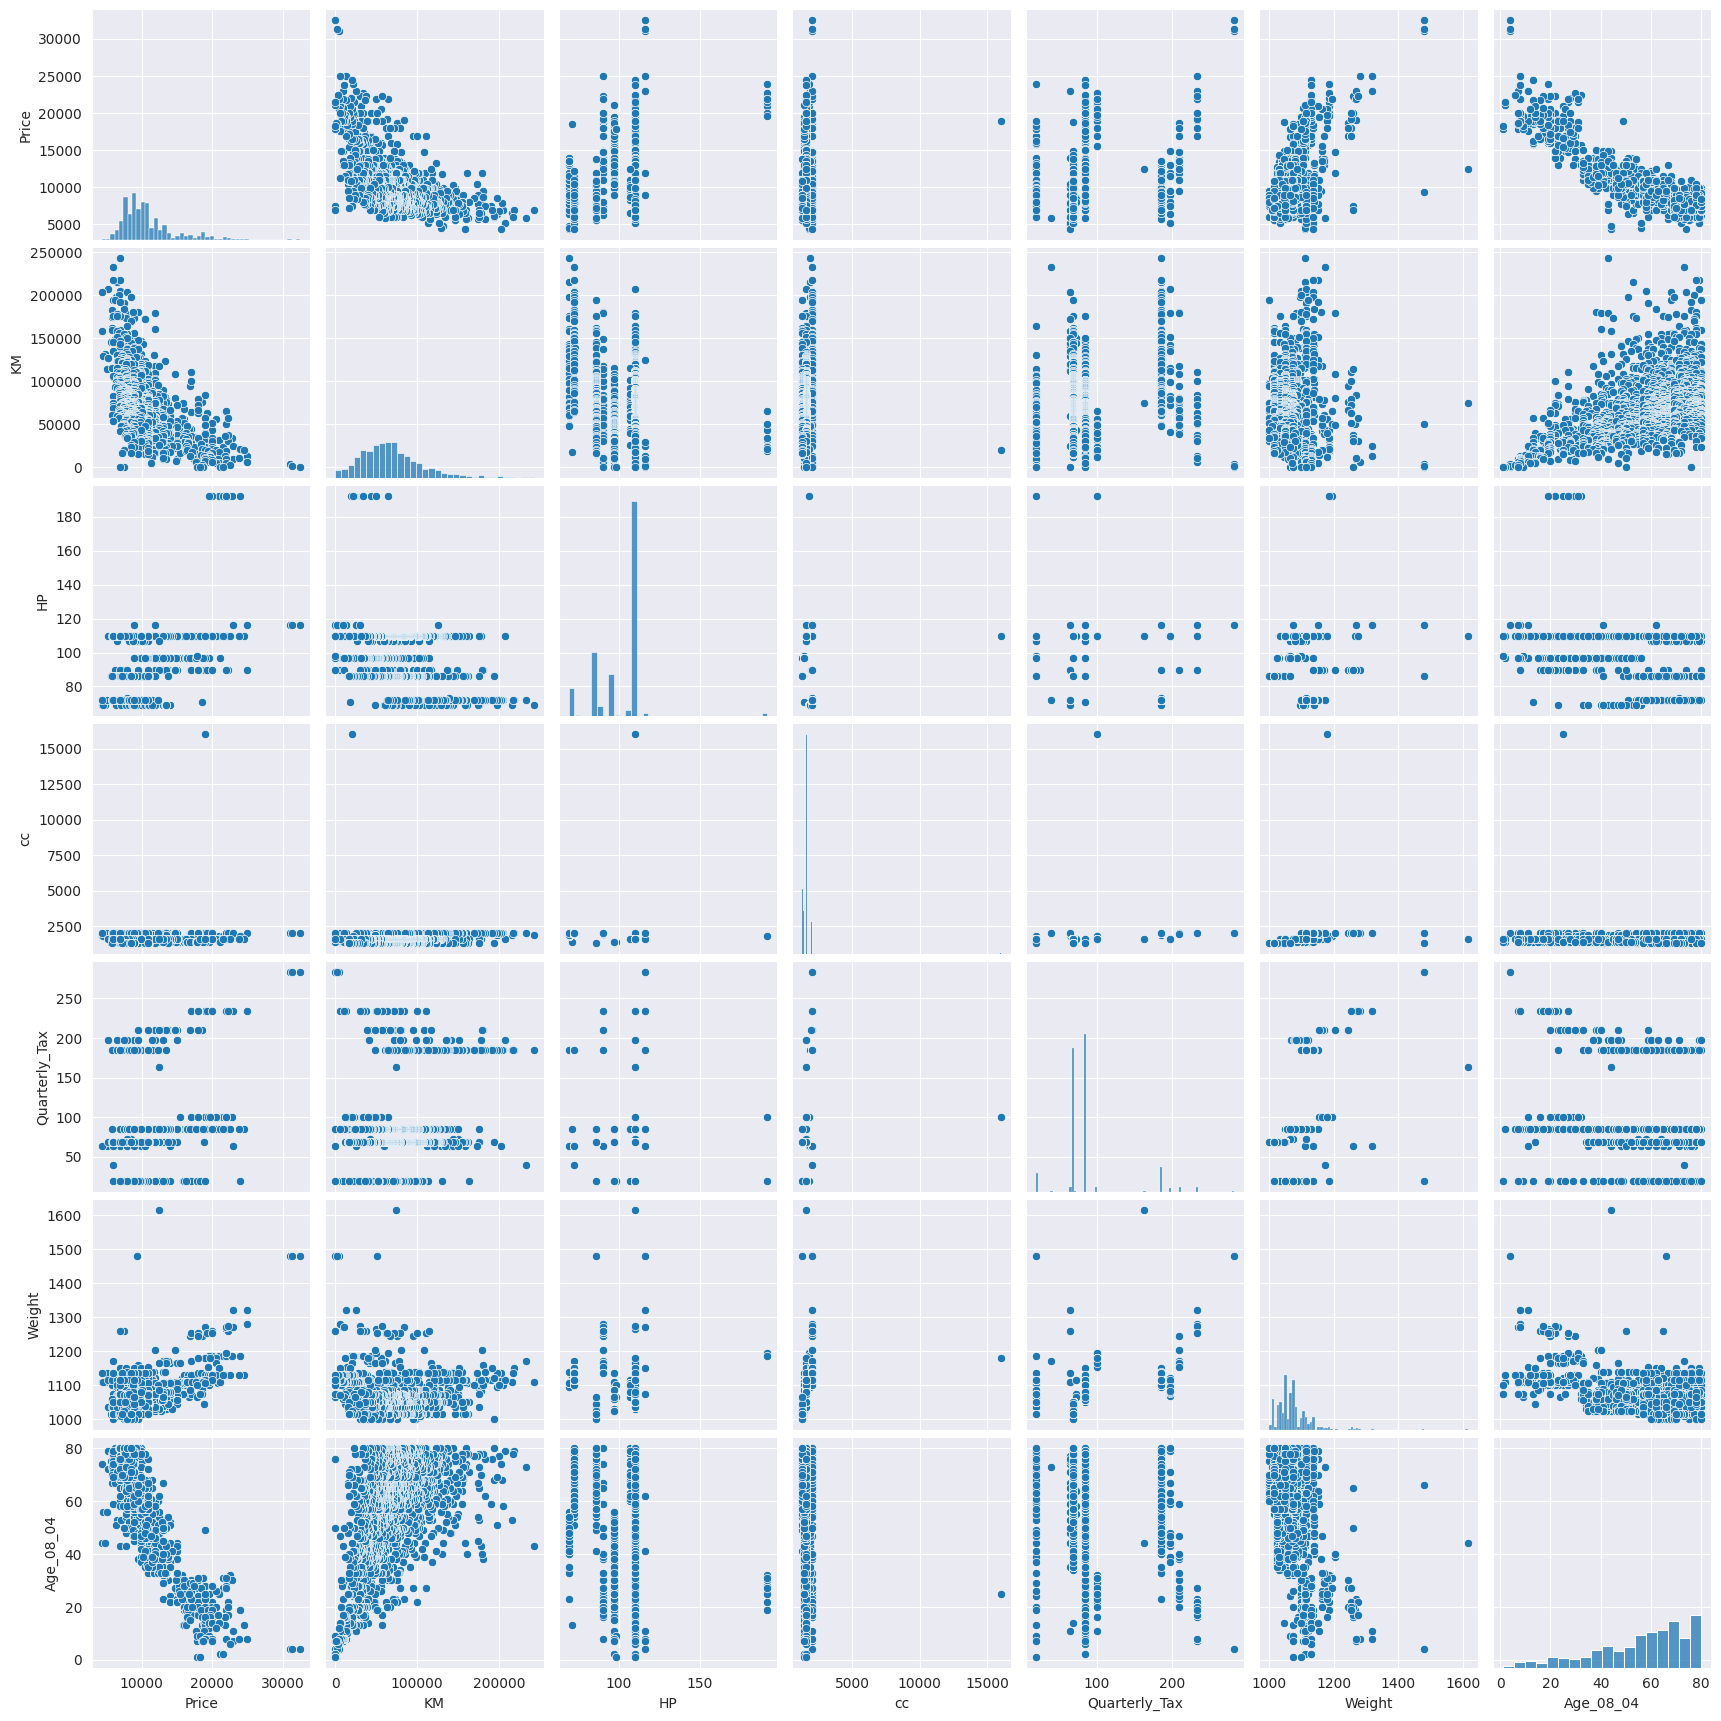

In [16]:
#scatter plot
sns.set_style(style='darkgrid')
sns.pairplot(data2)
plt.show()

In [17]:
# Remaining qaurtely tax to Qt
data3=data2.rename({'Quarterly_Tax':'QT','Age_08_04':'Age'},axis=1)
data3.head()

,Price,KM,HP,cc,QT,Weight,Age
0,13500,46986,90,2000,210,1165,23
1,13750,72937,90,2000,210,1165,23
2,13950,41711,90,2000,210,1165,24
3,14950,48000,90,2000,210,1165,26
4,13750,38500,90,2000,210,1170,30


In [ ]:
# buikding model without transformation

In [22]:
model_1= sm.ols("Price~Age+Weight+HP+cc+QT",data = data3).fit()


In [23]:
model_1.params

Intercept   -2184.811983
Age          -145.300779
Weight         16.077935
HP             42.117173
cc             -0.228719
QT             -1.290951
dtype: float64

In [ ]:
#calculating model accuracy

In [24]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1469.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        06:18:49   Log-Likelihood:                -12504.
No. Observations:                1436   AIC:                         2.502e+04
Df Residuals:                    1430   BIC:                         2.505e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2184.8120   1145.173     -1.908      0.057   -4431.211      61.587
Age         -145.3008      2.393    -60.708      0.000    -149.996    -140.606
Weight        16.0779      1.127     14.261      0.000      13.866      18.290
HP            42.1172      2.935     14.352      0.000      36.361      47.874
cc            -0.2287      0.098     -2.330      0.020      -0.421      -0.036
QT            -1.2910      1.377     -0.937      0.349      -3.993       1.411
==============================================================================
Omnibus:                      124.806   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.929
Skew:                          -0.181   Prob(JB):                    5.55e-146
Kurtosis:                       6.324   Cond. No.                     5.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#computVIF values

In [25]:
rsq_wt = sm.ols("Weight~QT+HP+Age+cc",data = data3).fit().rsquared
vif_wt = 1/(1-rsq_wt)

In [26]:
rsq_qt = sm.ols("QT~Weight+HP+Age+cc",data = data3).fit().rsquared
vif_qt = 1/(1-rsq_qt)

In [27]:
rsq_hp = sm.ols("HP~Weight+QT+Age+cc",data = data3).fit().rsquared
vif_hp = 1/(1-rsq_hp)

In [28]:
rsq_age = sm.ols("Age~Weight+HP+QT+cc",data = data3).fit().rsquared
vif_age = 1/(1-rsq_age)

In [29]:
rsq_cc = sm.ols("cc~Age+HP+QT+Weight",data = data3).fit().rsquared
vif_cc = 1/(1-rsq_cc)

In [30]:
t1 = {'Variables':['Weight','QT','HP','cc','Age'],'VIF':[vif_wt,vif_qt,vif_hp,vif_age,vif_cc]}
vif_frame = pd.DataFrame(t1)
vif_frame

,Variables,VIF
0,Weight,2.349166
1,QT,2.140673
2,HP,1.289038
3,cc,1.321768
4,Age,1.157660


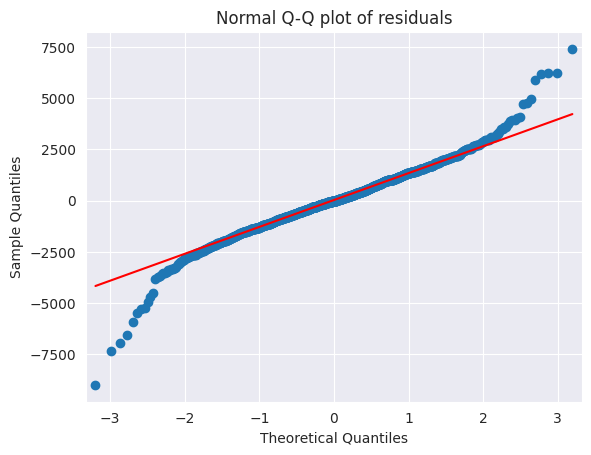

In [31]:
#checking for normality of residuals
sma.qqplot(model_1.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [32]:
#locating residual errors
list(np.where(model_1.resid>6000))

[array([109, 111, 147, 523])]

In [33]:
list(np.where(model_1.resid<-6000))

[array([191, 192, 221, 601])]

In [34]:
# homoscedacity or heteroscedacity of graph
def standard_values(vals):return(vals-vals.mean())/vals.std()

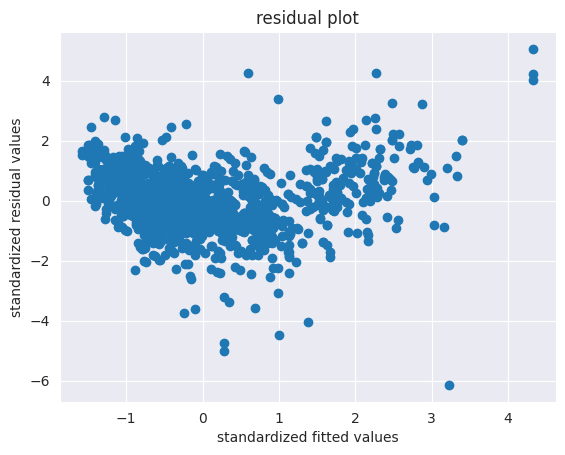

In [35]:
#residual scatter plot
plt.scatter(standard_values(model_1.fittedvalues),standard_values(model_1.resid))
plt.title('residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [ ]:
# Model deletion Diagnostics

In [36]:
# model deletion technique by influence plot and leverage values
#checking for outliers and influencers
(t,_)= model_1.get_influence().cooks_distance
t

array([5.04464888e-03, 4.17397801e-03, 3.06178481e-03, ...,
       3.66687520e-04, 4.53826964e-07, 2.99012980e-03])

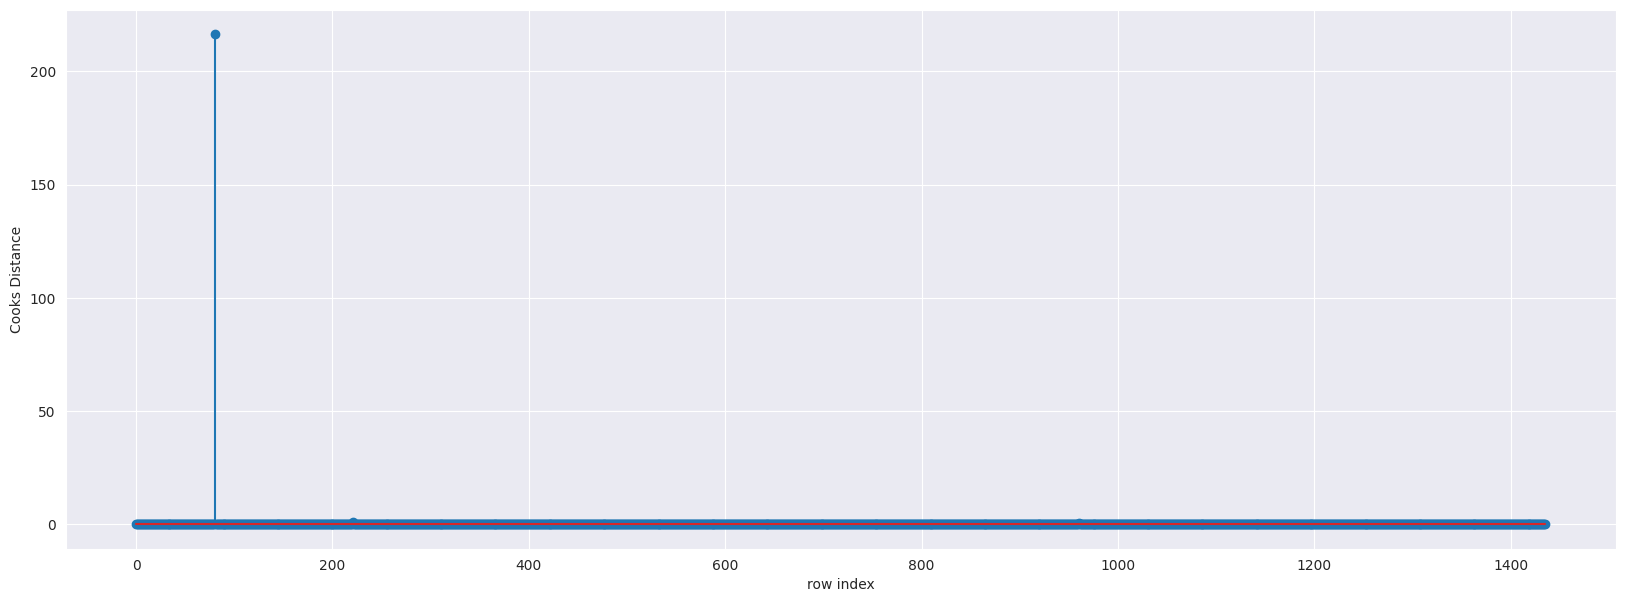

In [38]:
#plotting the stem plot for influencers
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data3)),np.round(t,5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
#checking the values
np.argmax(t),np.max(t)

(80, 216.36278482364668)

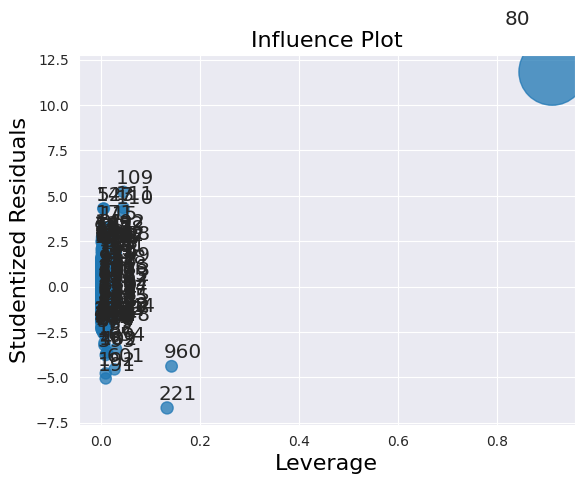

In [40]:
#computing out leverage value using high influence plot: points beyond our leverge_cutoff value are outliers
influence_plot(model_1)
plt.show()

In [42]:
# as we know leverage cutoff value is 3(k+1)/n
k = data3.shape[1]
n = data3.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.016713091922005572

In [43]:
#locating the influencer in our data
data3[data3.index.isin([80])]

,Price,KM,HP,cc,QT,Weight,Age
80,18950,20019,110,16000,100,1180,25


In [44]:
#since we know our influencer dropping the influencer and reset the dataset
data4 = data3.drop(data2.index[[80]],axis = 0).reset_index(drop = True)
data4

,Price,KM,HP,cc,QT,Weight,Age
0,13500,46986,90,2000,210,1165,23
1,13750,72937,90,2000,210,1165,23
2,13950,41711,90,2000,210,1165,24
3,14950,48000,90,2000,210,1165,26
4,13750,38500,90,2000,210,1170,30
...,...,...,...,...,...,...,...
1430,7500,20544,86,1300,69,1025,69
1431,10845,19000,86,1300,69,1015,72
1432,8500,17016,86,1300,69,1015,71
1433,7250,16916,86,1300,69,1015,70


In [45]:
#building  model with new dataset
#building first model
model_2 = sm.ols("Price~Age+Weight+HP+cc+QT",data = data4).fit()

In [46]:
#computing the parameters
model_2.params

Intercept   -3720.432778
Age          -138.556227
Weight         20.733320
HP             51.251114
cc             -3.756124
QT              7.456478
dtype: float64

In [47]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1632.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        07:20:16   Log-Likelihood:                -12429.
No. Observations:                1435   AIC:                         2.487e+04
Df Residuals:                    1429   BIC:                         2.490e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3720.4328   1101.020     -3.379      0.001   -5880.223   -1560.643
Age         -138.5562      2.355    -58.830      0.000    -143.176    -133.936
Weight        20.7333      1.146     18.090      0.000      18.485      22.982
HP            51.2511      2.906     17.635      0.000      45.550      56.952
cc            -3.7561      0.313    -12.012      0.000      -4.370      -3.143
QT             7.4565      1.509      4.942      0.000       4.497      10.416
==============================================================================
Omnibus:                      247.367   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2224.649
Skew:                          -0.520   Prob(JB):                         0.00
Kurtosis:                       9.010   Cond. No.                     5.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# accuracy is 85% we further check again

In [48]:
# model deletion technique by influence plot and leverage values
#checking for outliers and influencers
(c,_)= model_2.get_influence().cooks_distance
c

array([4.44522662e-03, 3.57194666e-03, 2.50131435e-03, ...,
       2.48842639e-04, 4.43201763e-05, 2.41797435e-03])

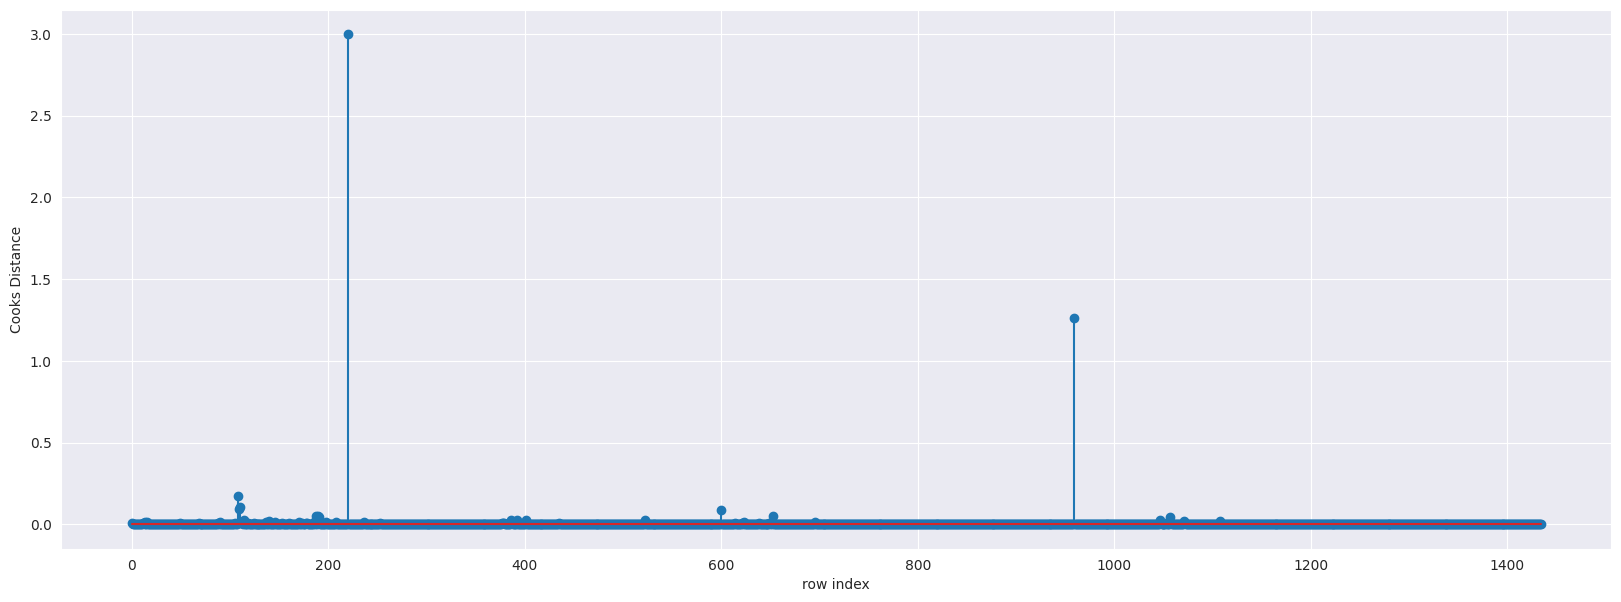

In [49]:
#plotting the stem plot for influencers
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data4)),np.round(c,5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
#checking the values
np.argmax(c),np.max(c)

(220, 2.9979815749963987)

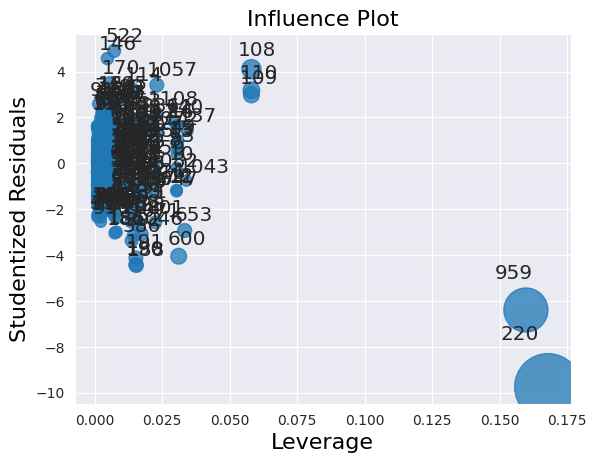

In [51]:
#computing out leverage value using high influence plot: points beyond our leverge_cutoff value are outliers
influence_plot(model_2)
plt.show()

In [52]:
# as we know leverage cutoff value is 3(k+1)/n
k = data4.shape[1]
n = data4.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.016724738675958188

In [53]:
#locating the influencer in data
data4[data4.index.isin([220])]

,Price,KM,HP,cc,QT,Weight,Age
220,12450,74172,110,1600,163,1615,44


In [54]:
#since we know our influencer dropping the influencer and reset the dataset
data5 = data4.drop(data3.index[[220]],axis = 0).reset_index(drop = True)
data5

,Price,KM,HP,cc,QT,Weight,Age
0,13500,46986,90,2000,210,1165,23
1,13750,72937,90,2000,210,1165,23
2,13950,41711,90,2000,210,1165,24
3,14950,48000,90,2000,210,1165,26
4,13750,38500,90,2000,210,1170,30
...,...,...,...,...,...,...,...
1429,7500,20544,86,1300,69,1025,69
1430,10845,19000,86,1300,69,1015,72
1431,8500,17016,86,1300,69,1015,71
1432,7250,16916,86,1300,69,1015,70


In [55]:
#building model with new dataset
#building model
model_3 = sm.ols("Price~Age+Weight+HP+cc+QT",data = data5).fit()

In [56]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1758.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        07:25:00   Log-Likelihood:                -12375.
No. Observations:                1434   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7902.6538   1149.585     -6.874      0.000   -1.02e+04   -5647.598
Age         -133.9869      2.329    -57.529      0.000    -138.556    -129.418
Weight        25.4932      1.213     21.019      0.000      23.114      27.872
HP            50.6086      2.816     17.972      0.000      45.085      56.132
cc            -4.4032      0.310    -14.200      0.000      -5.011      -3.795
QT             6.4373      1.465      4.393      0.000       3.563       9.312
==============================================================================
Omnibus:                      169.178   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.179
Skew:                          -0.357   Prob(JB):                    5.42e-224
Kurtosis:                       7.086   Cond. No.                     6.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#accuracy is now at 86%

In [57]:
# model deletion technique by influence plot and leverage values
#checking for outliers and influencers
(p,_)= model_3.get_influence().cooks_distance
p

array([4.38874175e-03, 3.49219186e-03, 2.41421838e-03, ...,
       2.61601577e-04, 4.77221747e-05, 3.99958044e-03])

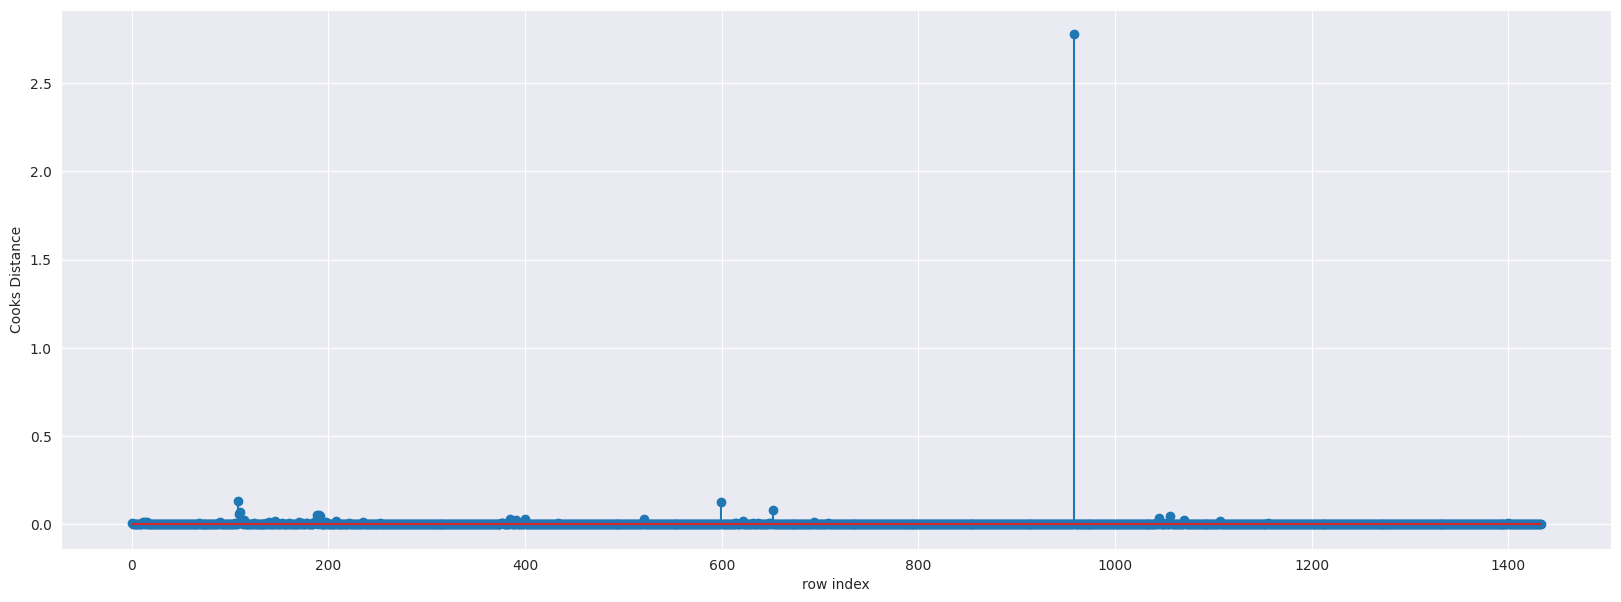

In [58]:
#plotting the stem plot for influencers
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data5)),np.round(p,5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
#checking the values
np.argmax(p),np.max(p)

(958, 2.7775444509734304)

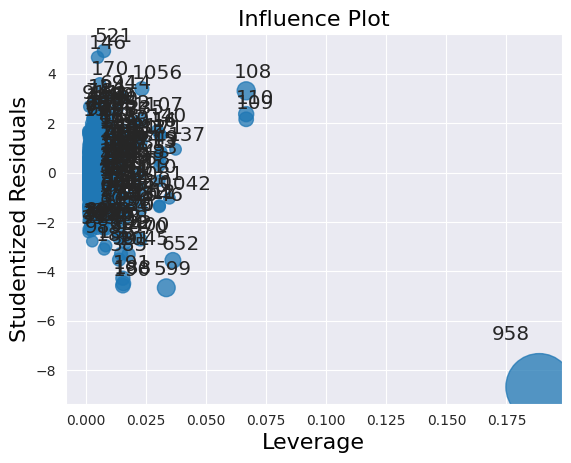

In [60]:
#computing out leverage value using high influence plot: points beyond our leverge_cutoff value are outliers
influence_plot(model_3)
plt.show()

In [61]:
# as we know leverage cutoff value is 3(k+1)/n
k = data5.shape[1]
n = data5.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.016736401673640166

In [62]:
#locating the influencer in our data
data5[data5.index.isin([958])]

,Price,KM,HP,cc,QT,Weight,Age
958,9390,50806,86,1300,19,1480,66


In [63]:
#since we know our influencer dropping the influencer and reset the dataset
data6 = data5.drop(data5.index[[958]],axis = 0).reset_index(drop = True)
data6

,Price,KM,HP,cc,QT,Weight,Age
0,13500,46986,90,2000,210,1165,23
1,13750,72937,90,2000,210,1165,23
2,13950,41711,90,2000,210,1165,24
3,14950,48000,90,2000,210,1165,26
4,13750,38500,90,2000,210,1170,30
...,...,...,...,...,...,...,...
1428,7500,20544,86,1300,69,1025,69
1429,10845,19000,86,1300,69,1015,72
1430,8500,17016,86,1300,69,1015,71
1431,7250,16916,86,1300,69,1015,70


In [64]:
#building our model with new dataset
#building our  model
model_4 = sm.ols("Price~Age+Weight+HP+cc+QT",data = data6).fit()

In [65]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1865.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        07:28:16   Log-Likelihood:                -12330.
No. Observations:                1433   AIC:                         2.467e+04
Df Residuals:                    1427   BIC:                         2.470e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.207e+04   1219.124     -9.900      0.000   -1.45e+04   -9677.337
Age         -129.4663      2.330    -55.576      0.000    -134.036    -124.897
Weight        30.3857      1.310     23.199      0.000      27.816      32.955
HP            47.6523      2.766     17.226      0.000      42.226      53.079
cc            -4.9150      0.308    -15.958      0.000      -5.519      -4.311
QT             3.9013      1.458      2.676      0.008       1.041       6.762
==============================================================================
Omnibus:                       86.903   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.301
Skew:                          -0.154   Prob(JB):                     1.03e-70
Kurtosis:                       5.303   Cond. No.                     6.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#model accuracy is now at 86.7%

In [66]:
# model deletion technique by influence plot and leverage values
#checking for outliers and influencers
(m,_)= model_4.get_influence().cooks_distance
m

array([4.02599916e-03, 3.13665411e-03, 2.09722879e-03, ...,
       2.61053543e-04, 5.56034134e-05, 7.08588377e-03])

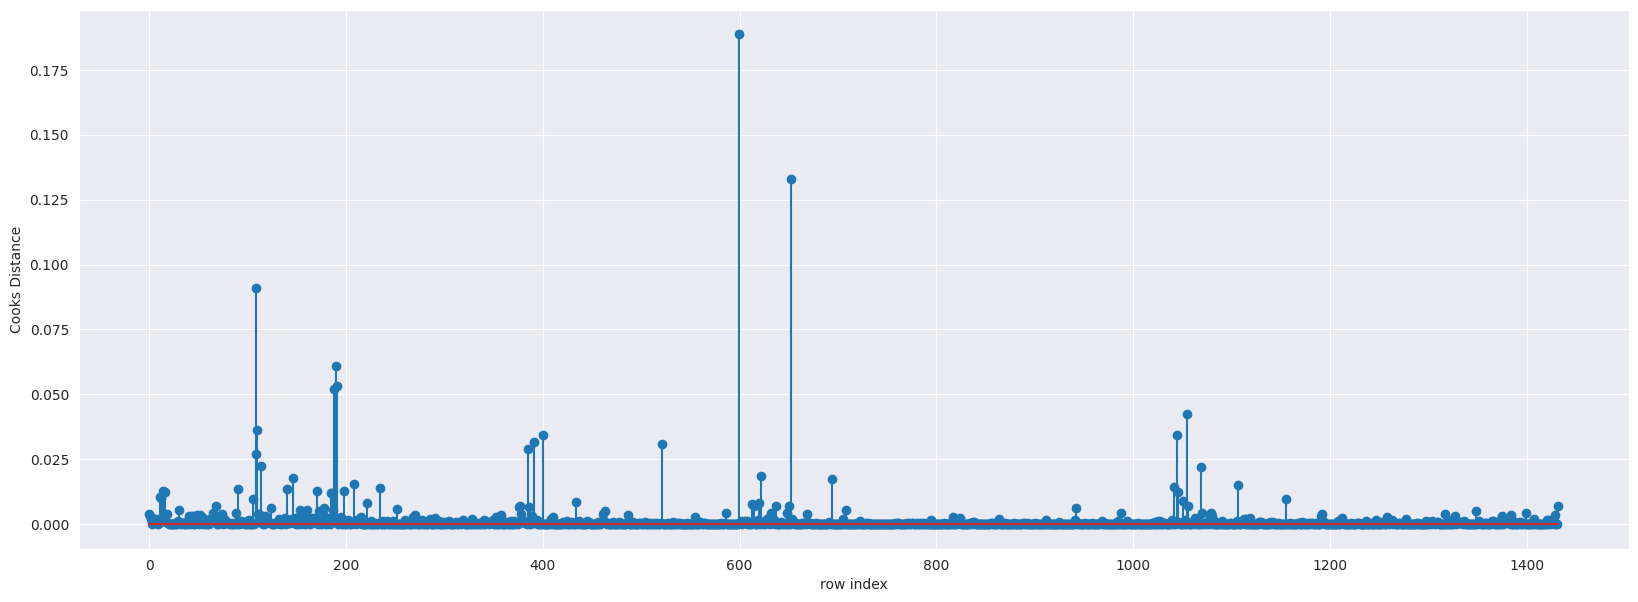

In [67]:
#plotting the stem plot for influencers
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data6)),np.round(m,5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [68]:
#checking the values
np.argmax(m),np.max(m)

(599, 0.1886787413968664)

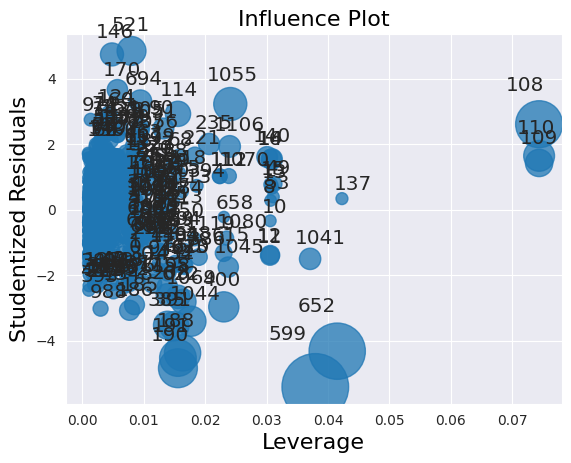

In [69]:
#computing out leverage value using high influence plot: points beyond our leverge_cutoff value are outliers
influence_plot(model_4)
plt.show()

In [ ]:
#Predictions

In [70]:
data6.describe()

,Price,KM,HP,cc,QT,Weight,Age
count,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,10724.824843,68575.550593,101.501047,1566.967900,87.108165,1071.721563,55.969993
std,3623.796435,37520.577428,14.987803,187.241532,41.081982,49.464492,18.596902
min,4350.000000,1.000000,69.000000,1300.000000,19.000000,1000.000000,1.000000
25%,8450.000000,43000.000000,90.000000,1400.000000,69.000000,1040.000000,44.000000
50%,9900.000000,63451.000000,110.000000,1600.000000,85.000000,1070.000000,61.000000
75%,11950.000000,87083.000000,110.000000,1600.000000,85.000000,1085.000000,70.000000
max,32500.000000,243000.000000,192.000000,2000.000000,283.000000,1480.000000,80.000000


In [71]:
#table containing r square for each model
d4 = {'prep models':['model_1','model_2','model_3','model_4'],'Rsquared':[model_1.rsquared,model_2.rsquared,model_3.rsquared,
                                                                        model_4.rsquared]}
table = pd.DataFrame(d4)
table

,prep models,Rsquared
0,model_1,0.837011
1,model_2,0.851003
2,model_3,0.860275
3,model_4,0.867276


In [72]:
#final model accuracy and aic
model_4.rsquared,model_4.aic

(0.8672756748265733, 24671.42644805344)

In [73]:
#storing the data of independent variables for our predictions
ind_data = pd.DataFrame({'HP':101,'cc':1566,'QT':87,'Weight':1071,'Age':55},index =[0])
ind_data

,HP,cc,QT,Weight,Age
0,101,1566,87,1071,55


In [74]:
#manual prediction
model_4.predict(ind_data)

0    10808.940319
dtype: float64

In [75]:
#predictions with accuracy at 86.7 %
predictions = model_4.predict(data6)
predictions

0       15630.672562
1       15630.672562
2       15501.206279
3       15242.273712
4       14876.336912
            ...     
1428     8121.064602
1429     7428.809086
1430     7558.275369
1431     7687.741652
1432     9393.202224
Length: 1433, dtype: float64

In [76]:
#setting up our X andY coordinates
X = model_4.fittedvalues
Y = predictions

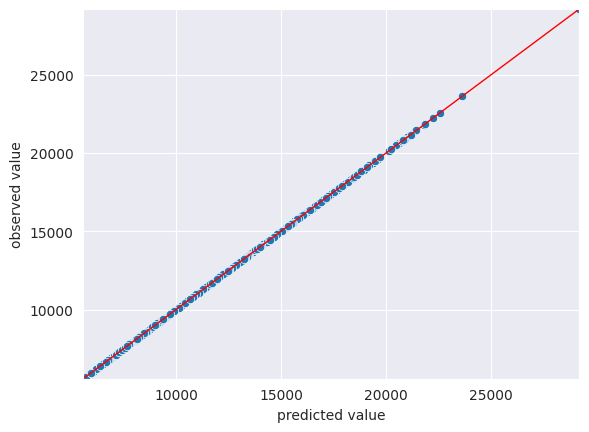

In [77]:
Y_max = Y.max()
Y_min =Y.min()
ax = sn.scatterplot(x = X,y = Y)
ax.set(ylim = (Y_min,Y_max))
ax.set(xlim =(Y_min,Y_max))
ax.set_xlabel("predicted value")
ax.set_ylabel("observed value")
X_ref = Y_ref = np.linspace(Y_min,Y_max,100)
plt.plot(X_ref,Y_ref,color = 'red',linewidth = 1)
plt.show()